In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 38.2 MB/s eta 0:00:00


In [2]:
import cv2
import easyocr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [3]:
from google.colab.patches import cv2_imshow

In [35]:
reader = easyocr.Reader(["en"])

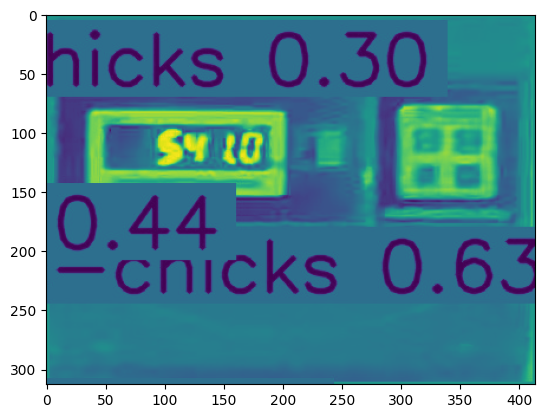

In [7]:
#Load the image
image = cv2.imread("/content/WhatsApp Image 2023-11-14 at 11.34.25_72aac361.jpg")

gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1)
plt.grid(False)
plt.show()

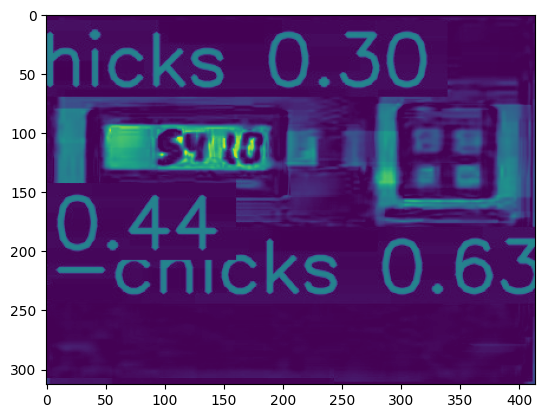

In [8]:
# initialize a rectangular kernel that is ~5x wider than it is tall,
# then smooth the image using a 3x3 Gaussian blur and then apply a
# blackhat morpholigical operator to find dark regions on a light background
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (51, 11))
blackhat = cv2.morphologyEx(gray1, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat)

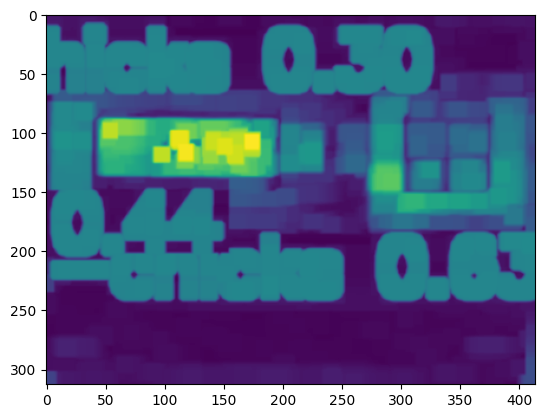

In [9]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilate = cv2.dilate(blackhat, kernal, iterations=3)
blur = cv2.GaussianBlur(dilate, (3, 3), 0)
plt.imshow(blur)

In [10]:
image_cpy = image.copy()

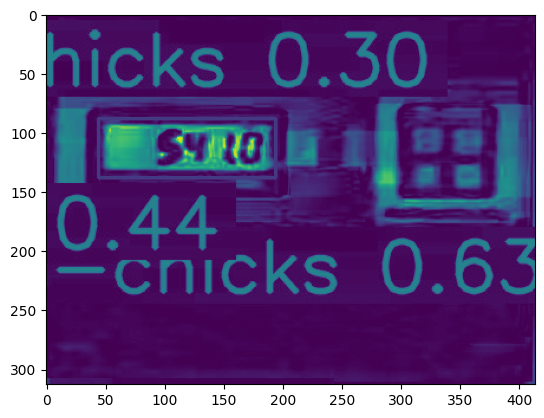

In [38]:
# Example thresholding (adjust parameters as needed)
_, thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)

# Find contours on the thresholded image
cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

results = []
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    # Adjust these conditions to better match the size criteria of your green boxes
    if h > 30 and w > 130:
        cv2.rectangle(blackhat, (x, y), (x + w, y + h), (36, 255, 12), 2)
        roi = blackhat[y:y + h, x:x + w]

        # Use EasyOCR for text extraction
        ocr_result = reader.readtext(roi)
        for detection in ocr_result:
            text = detection[1]
            # Replace characters with their numeric equivalents
            text = text.replace('S', '5').replace('L', '1').replace('l', '1').replace('I', '1').replace('i', '1').replace('J', '1').replace('j', '1')
            if text.isdigit() and text not in results:
                results.append(text)

plt.imshow(blackhat)
plt.show()

In [39]:
# Print the extracted text
print("Extracted Text:", results)

Extracted Text: ['51']
